In [1]:
### Importing important lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Importing training dataset.
train_data = pd.read_csv(r'C:\Users\aganwani\Downloads\Malignant-Comments-Classifier-Project--1-\Malignant Comments Classifier Project\train.csv')
train_data.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [3]:
### Checking size of training dataset.
print(f'There are {train_data.shape[0]} rows and {train_data.shape[1]} Columns in training dataset ')

There are 159571 rows and 8 Columns in training dataset 


In [4]:
### Importing test dataset.
test_data = pd.read_csv(r'C:\Users\aganwani\Downloads\Malignant-Comments-Classifier-Project--1-\Malignant Comments Classifier Project\test.csv')
test_data.head()

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [5]:
### Checking size of test dataset.
print(f'There are {test_data.shape[0]} rows and {test_data.shape[1]} columns in testing dataset') 

There are 153164 rows and 2 columns in testing dataset


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Showing data type of each column.

In [7]:
### Basic information about test data.
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [8]:
### Checking null values in our training dataset.
train_data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

 There are no null values in our Training dataset.

In [9]:
### Checking null values in test dataset.
test_data.isnull().sum()

id              0
comment_text    0
dtype: int64

In [10]:
### Checking data statistically.
train_data.describe()

malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

The mean and std difference is ok. Also we can see there are only 2 values in each column 0 and 1.

### Performing EDA. 

non-malignant => 144277
malignant => 15294


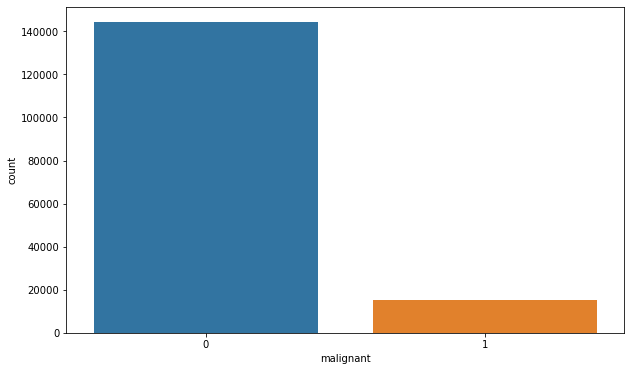

In [11]:
### Let's plot countplot to check Class Imbalancing.
plt.figure(figsize=(10,6))
sns.countplot(x=train_data['malignant'])
print('non-malignant =>',train_data.malignant.value_counts()[0])
print('malignant =>',train_data.malignant.value_counts()[1])
plt.show()

We can see there is class imbalance problem in our dataset as we have more count for Non-Malignant comments.

non-highly_malignant => 157976
highly_malignant => 1595


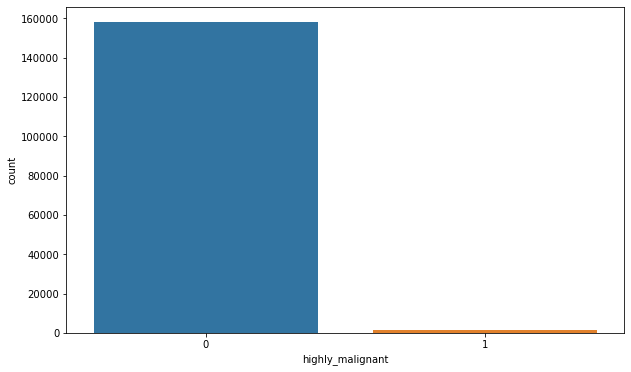

In [12]:
### Let's plot countplot to check Class Imbalancing.
plt.figure(figsize=(10,6))
print('non-highly_malignant =>',train_data.highly_malignant.value_counts()[0])
print('highly_malignant =>',train_data.highly_malignant.value_counts()[1])
sns.countplot(x=train_data['highly_malignant'])
plt.show()

Not-rude => 151122
rude => 8449


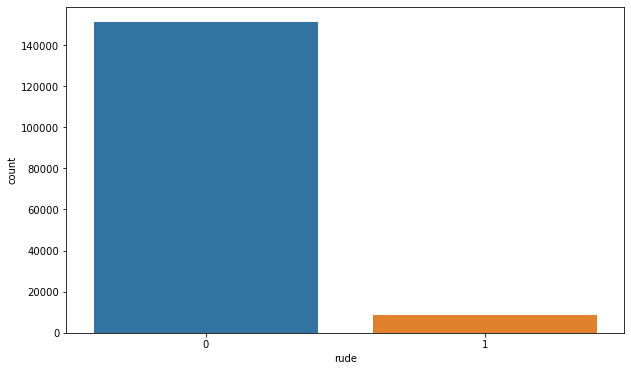

In [13]:
### Let's plot countplot to check Class Imbalancing.
plt.figure(figsize=(10,6))
print('Not-rude =>',train_data.rude.value_counts()[0])
print('rude =>',train_data.rude.value_counts()[1])
sns.countplot(x=train_data['rude'])
plt.show()

non-threat => 159093
threat => 478


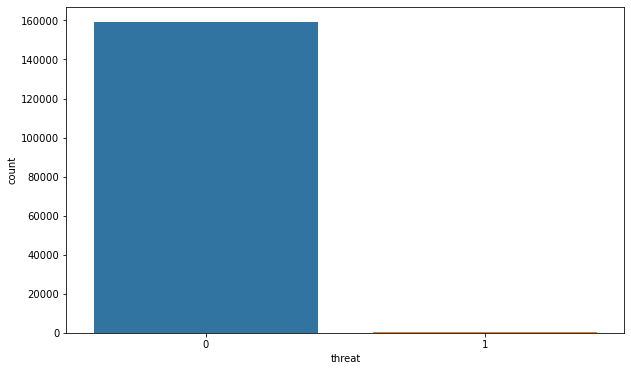

In [14]:
### Let's plot countplot to check Class Imbalancing.
plt.figure(figsize=(10,6))
print('non-threat =>',train_data.threat.value_counts()[0])
print('threat =>',train_data.threat.value_counts()[1])
sns.countplot(x=train_data['threat'])
plt.show()

not-abuse => 151694
abuse => 7877


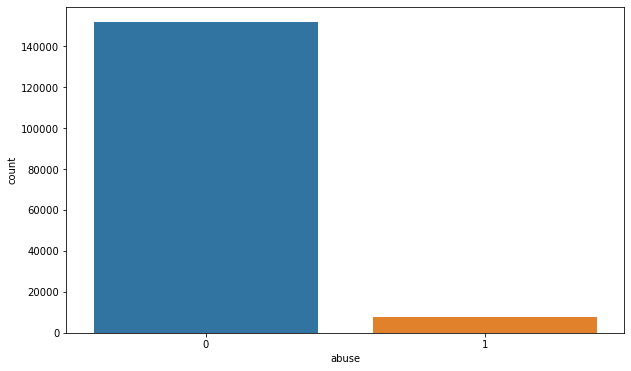

In [15]:
### Let's plot countplot to check Class Imbalancing.
plt.figure(figsize=(10,6))
print('not-abuse =>',train_data.abuse.value_counts()[0])
print('abuse =>',train_data.abuse.value_counts()[1])
sns.countplot(x=train_data['abuse'])
plt.show()

not loathe => 158166
loathe => 1405


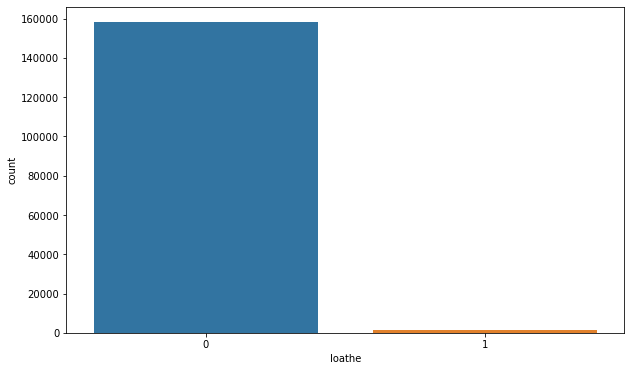

In [16]:
### Let's plot countplot to check Class Imbalancing.
plt.figure(figsize=(10,6))
print('not loathe =>',train_data.loathe.value_counts()[0])
print('loathe =>',train_data.loathe.value_counts()[1])
sns.countplot(x=train_data['loathe'])
plt.show()

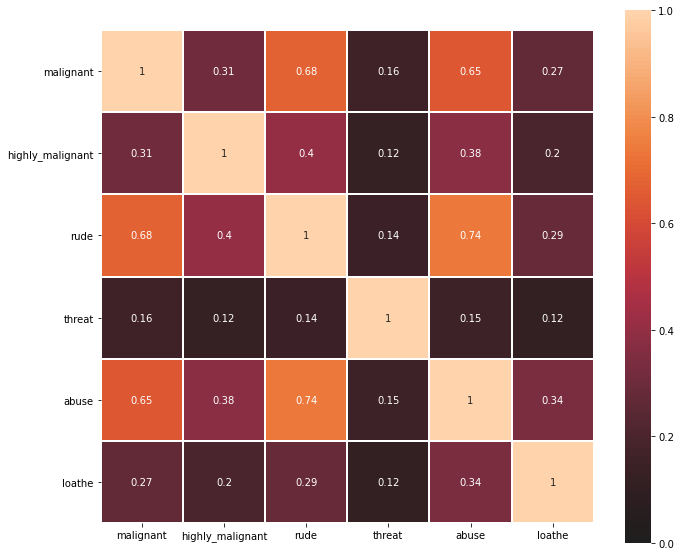

In [17]:
train_corr = train_data.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(train_corr,vmin=0,vmax=1,annot=True, square=True, center=0, linewidths=1)
plt.tight_layout()

 As we can see Malignant has strong relationship with Rude and Abuse comments. Also we can see abuse and Rude also have strong relationshop between each other.

In [18]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

In [19]:
train_data['length'] = train_data['comment_text'].str.len()
train_data.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  length  
0          0                 0     0       0      0       0     264  
1          0                 0     0       0      0       0     112  
2          0                 0     0       0      0       0     233  
3          0                 0     0       0      0       0     622  
4          0                 0     0       0      0       0      67

In [20]:
train_data['comment_text'] = train_data['comment_text'].str.lower() ### Converting all the comments in lower case.
train_data['comment_text'] = train_data['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress') ### Replacing email address by emailaddress
train_data['comment_text'] = train_data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','weblink') ### Replacing all the web links with weblink
train_data['comment_text'] = train_data['comment_text'].str.replace(r'£|\$', 'dollers') ### replacing all the curreny sign into doller.
train_data['comment_text'] = train_data['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber') ###Replacing contactnumber with phonenumber.
train_data['comment_text'] = train_data['comment_text'].str.replace(r'\d+(\.\d+)?', 'number') ###Replacing numbers with number.

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aganwani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aganwani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
train_data['comment_text'] = train_data['comment_text'].apply(lambda x:' '.join(term for term in x.split()
                                                                                if term not in string.punctuation))

stop_words = set(stopwords.words('english')+['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train_data['comment_text'] = train_data['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

lem =WordNetLemmatizer()
train_data['comment_text'] = train_data['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [24]:
train_data['clean_length'] = train_data.comment_text.str.len()
train_data

id                                       comment_text  \
0       0000997932d777bf  explanation edits made username hardcore metal...   
1       000103f0d9cfb60f  d'aww! match background colour i'm seemingly s...   
2       000113f07ec002fd  hey man, i'm really trying edit war. guy const...   
3       0001b41b1c6bb37e  can't make real suggestion improvement wondere...   
4       0001d958c54c6e35    you, sir, hero. chance remember page that's on?   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::and second time asking, view completely ...   
159567  ffea4adeee384e90  ashamed horrible thing put talk page. number.n...   
159568  ffee36eab5c267c9  spitzer umm, there actual article prostitution...   
159569  fff125370e4aaaf3  look like actually put speedy first version de...   
159570  fff46fc426af1f9a  ... really think understand. came idea bad rig...   

        malignant  highly_malignant  rude  threat  abuse  loathe  length  \
0               0                 0     0       0      0       0     264   
1               0                 0     0       0      0       0     112   
2               0                 0     0       0      0       0     233   
3               0                 0     0       0      0       0     622   
4               0                 0     0       0      0       0      67   
...           ...               ...   ...     ...    ...     ...     ...   
159566          0                 0     0       0      0       0     295   
159567          0                 0     0       0      0       0      99   
159568          0                 0     0       0      0       0      81   
159569          0                 0     0       0      0       0     116   
159570          0                 0     0       0      0       0     189   

        clean_length  
0                182  
1                115  
2                149  
3                397  
4                 47  
...              ...  
159566           211  
159567            51  
159568            68  
159569            60  
159570           129  

[159571 rows x 10 columns]

In [25]:
print ('actual', train_data.length.sum())
print ('Clean Length', train_data.clean_length.sum())

actual 62893130
Clean Length 43766505


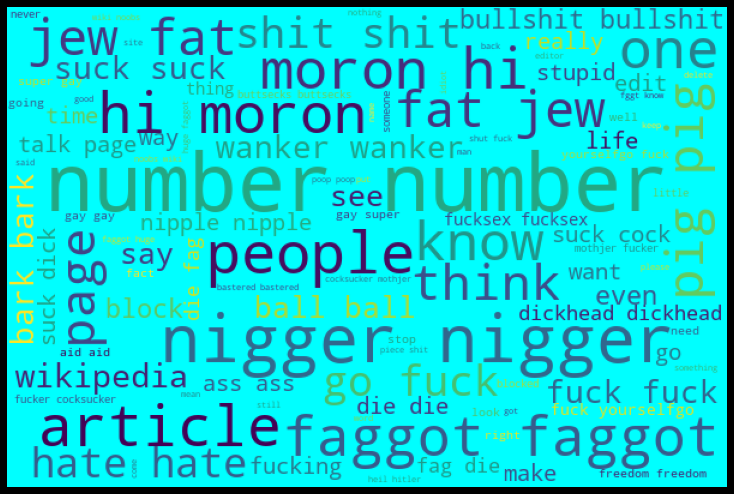

In [26]:
from wordcloud import WordCloud

offensive = train_data['comment_text'][train_data['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='cyan',max_words=100).generate(' '.join(offensive))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
train_data.head()

id                                       comment_text  \
0  0000997932d777bf  explanation edits made username hardcore metal...   
1  000103f0d9cfb60f  d'aww! match background colour i'm seemingly s...   
2  000113f07ec002fd  hey man, i'm really trying edit war. guy const...   
3  0001b41b1c6bb37e  can't make real suggestion improvement wondere...   
4  0001d958c54c6e35    you, sir, hero. chance remember page that's on?   

   malignant  highly_malignant  rude  threat  abuse  loathe  length  \
0          0                 0     0       0      0       0     264   
1          0                 0     0       0      0       0     112   
2          0                 0     0       0      0       0     233   
3          0                 0     0       0      0       0     622   
4          0                 0     0       0      0       0      67   

   clean_length  
0           182  
1           115  
2           149  
3           397  
4            47

In [28]:
target_cols = ['malignant','highly_malignant','rude','threat','abuse','loathe']

In [29]:
train_data['bad_comment'] = train_data[target_cols].sum(axis=1)
train_data['bad_comment'] = train_data['bad_comment'] > 0
train_data['bad_comment'] = train_data['bad_comment'].astype(int)

Good comments =  143346
Bad comments =  16225


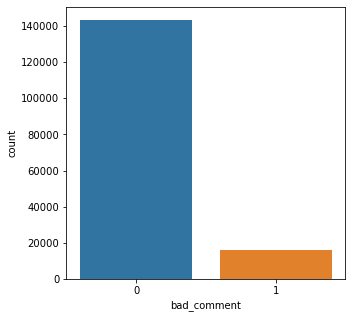

In [36]:
plt.figure(figsize=(5,5))
print('Good comments = ',train_data.bad_comment.value_counts()[0])
print('Bad comments = ',train_data.bad_comment.value_counts()[1])
sns.countplot(x= train_data['bad_comment'])
plt.show()

In [37]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
X = tf_vec.fit_transform(train_data['comment_text'])


AttributeError: head not found

In [40]:
Y = train_data['bad_comment']

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30, random_state = 100)

In [43]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(111699, 10000) (111699,) (47872, 10000) (47872,)


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
### importing metrics to evaluate models.
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [62]:
### Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test)

In [65]:
print(confusion_matrix(y_test,y_lr_pred))
accuracy_lr = classification_report(y_test,y_lr_pred)
print(accuracy_lr)
cv_lr = cross_val_score(lr,X,Y,cv=5).mean()
print('Cross validation score :',cv_lr)

[[42781   234]
 [ 1893  2964]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43015
           1       0.93      0.61      0.74      4857

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872

Cross validation score : 0.9560885055619721
